In [2]:
import matplotlib.pyplot as plt
from torchvision.io import read_image




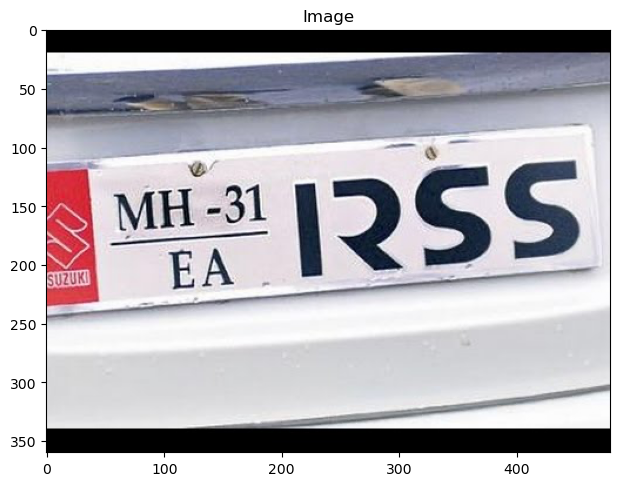

In [4]:
from PIL import Image
import torchvision.transforms as transforms

img = Image.open("/Users/mehdiarat/Downloads/archive (1)/images/Cars76.png")
transform = transforms.ToTensor()
image_tensor = transform(img)
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Image")
plt.imshow(image_tensor.permute(1, 2, 0))


In [5]:
import torch

if torch.backends.mps.is_available():
    print("MPS backend is available.")
else:
    print("MPS backend is not available. Using CPU instead.")

MPS backend is available.


In [14]:
import xml.etree.ElementTree as ET

def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    annotation_data = {
        'filename': root.find('filename').text,
        'objects': []
    }
    
    for obj in root.iter('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        
        annotation_data['objects'].append({
            'label': label,
            'bbox': [xmin, ymin, xmax, ymax]
        })
    
    return annotation_data

In [47]:
 v

In [48]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

train_dataset = CarsDataset(
    img_dir='/Users/mehdiarat/Downloads/archive (1)/images',
    ann_dir='/Users/mehdiarat/Downloads/archive (1)/annotations',
    transform=data_transforms['train']
)

val_dataset = CarsDataset(
    img_dir='/Users/mehdiarat/Downloads/archive (1)/images',
    ann_dir='/Users/mehdiarat/Downloads/archive (1)/annotations',
    transform=data_transforms['val']
)
def custom_collate_fn(batch):
    images = []
    annotations = []

    for b in batch:
        images.append(b[0])
        annotations.append(b[1])  # Annotations are stored as dictionaries

    # Stack images into a single tensor
    images = torch.stack(images, dim=0)

    # Return images and annotations separately
    return images, annotations
dataloaders = {
    'train': torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0, collate_fn=custom_collate_fn),
    'val': torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=0, collate_fn=custom_collate_fn)
}

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [27]:
'''data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/Users/mehdiarat/Downloads/archive (1)/images'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
'''

'data_transforms = {\n    \'train\': transforms.Compose([\n        transforms.RandomResizedCrop(224),\n        transforms.RandomHorizontalFlip(),\n        transforms.ToTensor(),\n        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n    ]),\n    \'val\': transforms.Compose([\n        transforms.Resize(256),\n        transforms.CenterCrop(224),\n        transforms.ToTensor(),\n        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n    ]),\n}\n\ndata_dir = \'/Users/mehdiarat/Downloads/archive (1)/images\'\nimage_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),\n                                          data_transforms[x])\n                  for x in [\'train\', \'val\']}\ndataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,\n                                             shuffle=True, num_workers=4)\n              for x in [\'train\', \'val\']}\ndataset_sizes = {x: len(image_datasets[x]) for x in [\'train\',

In [31]:
for images, annotations in dataloaders['train']:
    print(images.shape)        # Shape of the image batch
    print(annotations)         # List of annotations, one per image
    # Your training logic here

torch.Size([4, 3, 224, 224])
[{'filename': 'Cars319.png', 'objects': [{'label': 'licence', 'bbox': [167, 228, 232, 259]}]}, {'filename': 'Cars80.png', 'objects': [{'label': 'licence', 'bbox': [94, 148, 279, 186]}]}, {'filename': 'Cars49.png', 'objects': [{'label': 'licence', 'bbox': [268, 171, 314, 190]}]}, {'filename': 'Cars312.png', 'objects': [{'label': 'licence', 'bbox': [111, 66, 518, 246]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars100.png', 'objects': [{'label': 'licence', 'bbox': [175, 114, 214, 131]}]}, {'filename': 'Cars226.png', 'objects': [{'label': 'licence', 'bbox': [249, 194, 318, 213]}]}, {'filename': 'Cars198.png', 'objects': [{'label': 'licence', 'bbox': [166, 225, 273, 246]}]}, {'filename': 'Cars269.png', 'objects': [{'label': 'licence', 'bbox': [110, 199, 147, 217]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars82.png', 'objects': [{'label': 'licence', 'bbox': [190, 59, 257, 77]}]}, {'filename': 'Cars294.png', 'objects': [{'label': 'licence', 'bbox': [1

torch.Size([4, 3, 224, 224])
[{'filename': 'Cars199.png', 'objects': [{'label': 'licence', 'bbox': [59, 88, 310, 158]}]}, {'filename': 'Cars65.png', 'objects': [{'label': 'licence', 'bbox': [207, 200, 300, 260]}]}, {'filename': 'Cars307.png', 'objects': [{'label': 'licence', 'bbox': [172, 163, 437, 220]}]}, {'filename': 'Cars301.png', 'objects': [{'label': 'licence', 'bbox': [205, 107, 303, 135]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars246.png', 'objects': [{'label': 'licence', 'bbox': [49, 163, 112, 193]}]}, {'filename': 'Cars316.png', 'objects': [{'label': 'licence', 'bbox': [377, 405, 476, 439]}, {'label': 'licence', 'bbox': [379, 192, 455, 220]}]}, {'filename': 'Cars144.png', 'objects': [{'label': 'licence', 'bbox': [101, 114, 215, 154]}]}, {'filename': 'Cars118.png', 'objects': [{'label': 'licence', 'bbox': [193, 165, 394, 217]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars344.png', 'objects': [{'label': 'licence', 'bbox': [240, 158, 379, 217]}]}, {'filename': 'Ca

torch.Size([4, 3, 224, 224])
[{'filename': 'Cars59.png', 'objects': [{'label': 'licence', 'bbox': [324, 162, 375, 175]}]}, {'filename': 'Cars122.png', 'objects': [{'label': 'licence', 'bbox': [195, 147, 254, 169]}]}, {'filename': 'Cars406.png', 'objects': [{'label': 'licence', 'bbox': [285, 185, 374, 226]}]}, {'filename': 'Cars430.png', 'objects': [{'label': 'licence', 'bbox': [38, 159, 116, 197]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars53.png', 'objects': [{'label': 'licence', 'bbox': [146, 187, 260, 213]}]}, {'filename': 'Cars145.png', 'objects': [{'label': 'licence', 'bbox': [282, 236, 422, 283]}]}, {'filename': 'Cars41.png', 'objects': [{'label': 'licence', 'bbox': [109, 182, 159, 206]}]}, {'filename': 'Cars238.png', 'objects': [{'label': 'licence', 'bbox': [276, 186, 396, 273]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars180.png', 'objects': [{'label': 'licence', 'bbox': [151, 115, 304, 187]}]}, {'filename': 'Cars102.png', 'objects': [{'label': 'licence', 'bbox':

torch.Size([4, 3, 224, 224])
[{'filename': 'Cars236.png', 'objects': [{'label': 'licence', 'bbox': [223, 106, 250, 119]}]}, {'filename': 'Cars242.png', 'objects': [{'label': 'licence', 'bbox': [224, 170, 277, 199]}]}, {'filename': 'Cars390.png', 'objects': [{'label': 'licence', 'bbox': [360, 118, 397, 136]}, {'label': 'licence', 'bbox': [6, 144, 49, 162]}]}, {'filename': 'Cars257.png', 'objects': [{'label': 'licence', 'bbox': [167, 132, 241, 166]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars333.png', 'objects': [{'label': 'licence', 'bbox': [117, 157, 270, 191]}]}, {'filename': 'Cars78.png', 'objects': [{'label': 'licence', 'bbox': [149, 210, 249, 239]}]}, {'filename': 'Cars60.png', 'objects': [{'label': 'licence', 'bbox': [45, 98, 364, 159]}]}, {'filename': 'Cars321.png', 'objects': [{'label': 'licence', 'bbox': [134, 235, 169, 246]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars330.png', 'objects': [{'label': 'licence', 'bbox': [29, 192, 57, 203]}, {'label': 'licence', 'b

torch.Size([4, 3, 224, 224])
[{'filename': 'Cars134.png', 'objects': [{'label': 'licence', 'bbox': [76, 151, 133, 174]}]}, {'filename': 'Cars152.png', 'objects': [{'label': 'licence', 'bbox': [92, 258, 199, 284]}]}, {'filename': 'Cars258.png', 'objects': [{'label': 'licence', 'bbox': [158, 184, 230, 232]}]}, {'filename': 'Cars317.png', 'objects': [{'label': 'licence', 'bbox': [164, 202, 240, 220]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars119.png', 'objects': [{'label': 'licence', 'bbox': [187, 140, 217, 153]}]}, {'filename': 'Cars34.png', 'objects': [{'label': 'licence', 'bbox': [147, 181, 260, 206]}]}, {'filename': 'Cars275.png', 'objects': [{'label': 'licence', 'bbox': [99, 150, 162, 167]}]}, {'filename': 'Cars202.png', 'objects': [{'label': 'licence', 'bbox': [197, 135, 249, 159]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars91.png', 'objects': [{'label': 'licence', 'bbox': [269, 170, 317, 189]}]}, {'filename': 'Cars396.png', 'objects': [{'label': 'licence', 'bbox': 

torch.Size([4, 3, 224, 224])
[{'filename': 'Cars9.png', 'objects': [{'label': 'licence', 'bbox': [164, 224, 272, 247]}]}, {'filename': 'Cars432.png', 'objects': [{'label': 'licence', 'bbox': [95, 258, 196, 284]}]}, {'filename': 'Cars108.png', 'objects': [{'label': 'licence', 'bbox': [158, 216, 277, 248]}]}, {'filename': 'Cars341.png', 'objects': [{'label': 'licence', 'bbox': [47, 161, 115, 192]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars212.png', 'objects': [{'label': 'licence', 'bbox': [105, 94, 290, 141]}]}, {'filename': 'Cars244.png', 'objects': [{'label': 'licence', 'bbox': [20, 87, 360, 155]}]}, {'filename': 'Cars263.png', 'objects': [{'label': 'licence', 'bbox': [129, 260, 232, 290]}]}, {'filename': 'Cars27.png', 'objects': [{'label': 'licence', 'bbox': [148, 127, 245, 159]}]}]
torch.Size([4, 3, 224, 224])
[{'filename': 'Cars365.png', 'objects': [{'label': 'licence', 'bbox': [293, 205, 373, 226]}]}, {'filename': 'Cars388.png', 'objects': [{'label': 'licence', 'bbox': [14

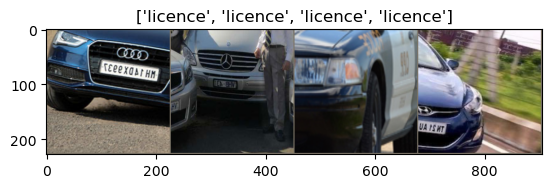

In [37]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, annotations = next(iter(dataloaders['train']))

# Extract labels from the annotations
labels = [ann['objects'][0]['label'] for ann in annotations]  # Assuming each image has at least one object

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

# Display the images with their respective labels
imshow(out, title=labels)

In [52]:
import torch
import os
from PIL import Image
import torchvision.transforms as transforms
import xml.etree.ElementTree as ET
from torch.utils.data import Dataset

label_map = {
    'license_plate': 1
}

class LicensePlateDataset(Dataset):
    def __init__(self, img_dir, ann_dir, transform=None):
        self.img_dir = img_dir
        self.ann_dir = ann_dir
        self.transform = transform
        self.img_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = self.img_files[idx]
        img_path = os.path.join(self.img_dir, img_name)
        ann_path = os.path.join(self.ann_dir, img_name.replace('.png', '.xml'))

        image = Image.open(img_path).convert("RGB")
        boxes, labels = self.parse_annotation(ann_path)

        if self.transform:
            image = self.transform(image)

        target = {
            'boxes': torch.tensor(boxes, dtype=torch.float32),
            'labels': torch.tensor(labels, dtype=torch.int64)
        }

        return image, target

    def parse_annotation(self, ann_path):
        tree = ET.parse(ann_path)
        root = tree.getroot()

        boxes = []
        labels = []
        for obj in root.findall('object'):
            label = obj.find('name').text
            
            # Convert label name to integer using the label_map
            labels.append(label_map[label])

            bbox = obj.find('bndbox')
            xmin = float(bbox.find('xmin').text)
            ymin = float(bbox.find('ymin').text)
            xmax = float(bbox.find('xmax').text)
            ymax = float(bbox.find('ymax').text)
            boxes.append([xmin, ymin, xmax, ymax])

        return boxes, labels

In [53]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Modify the model's head to suit your number of classes
num_classes = 2  # Assuming background + 1 object class (e.g., cars)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

model = model.to(device)

In [54]:
import torch.optim as optim

# Set up the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, targets in dataloaders['train']:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()
        optimizer.step()

        running_loss += losses.item()

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

ValueError: invalid literal for int() with base 10: 'licence'

In [46]:
model.eval()

with torch.no_grad():
    image, _ = val_dataset[0]  # Get an image from the validation set
    image = image.to(device)
    prediction = model([image])

    print(prediction)

[{'boxes': tensor([[6.5920e+00, 1.4990e+02, 1.1264e+01, 1.5557e+02],
        [1.6764e+02, 9.5203e+01, 1.7455e+02, 1.0235e+02],
        [0.0000e+00, 1.7387e+02, 9.0148e+00, 1.8375e+02],
        [2.8413e+01, 1.9049e+02, 3.3011e+01, 1.9361e+02],
        [2.0358e+02, 9.4894e+01, 2.1030e+02, 1.0162e+02],
        [1.4540e+02, 1.7242e+02, 1.5328e+02, 1.7704e+02],
        [1.4767e+02, 1.1582e+02, 1.5183e+02, 1.2132e+02],
        [1.5488e+02, 1.3363e+02, 1.5879e+02, 1.3867e+02],
        [7.4403e+01, 2.7901e+01, 7.9348e+01, 3.2101e+01],
        [7.4599e-02, 1.8510e+02, 6.4258e+00, 1.9385e+02],
        [6.2221e+00, 1.5284e+02, 9.8537e+00, 1.5642e+02],
        [3.8678e+01, 1.6186e+02, 4.5230e+01, 1.6683e+02],
        [3.7380e+01, 1.6096e+02, 4.2002e+01, 1.6579e+02],
        [1.4915e+02, 1.1732e+02, 1.5213e+02, 1.2253e+02],
        [2.1333e+02, 2.7426e+01, 2.1840e+02, 3.0401e+01],
        [1.4673e+02, 1.7140e+02, 1.5316e+02, 1.7505e+02],
        [7.1438e+01, 2.8934e+01, 7.5757e+01, 3.3273e+01],
   

In [58]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import xml.etree.ElementTree as ET
import pandas as pd

# Anotasyonları ve görüntüleri işleyip veri kümesi oluşturma
class LicensePlateDataset(Dataset):
    def __init__(self, annotations_dir, img_dir, transform=None):
        self.annotations_dir = annotations_dir
        self.img_dir = img_dir
        self.transform = transform
        self.img_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]
    
    def __len__(self):
        return len(self.img_files)
    
    def __getitem__(self, idx):
        img_file = self.img_files[idx]
        img_path = os.path.join(self.img_dir, img_file)
        annotation_file = os.path.join(self.annotations_dir, img_file.replace('.png', '.xml'))

        # Görüntüyü yükleme
        image = Image.open(img_path).convert("RGB")
        
        # XML'den bounding box bilgilerini çıkarma
        tree = ET.parse(annotation_file)
        root = tree.getroot()
        bndbox = root.find(".//bndbox")
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        
        # Bounding box normalizasyonu
        bbox = [xmin, ymin, xmax, ymax]
        bbox = torch.tensor(bbox, dtype=torch.float32)

        if self.transform:
            image = self.transform(image)
        
        return image, bbox

# Görüntüleri ön işlemek için gerekli dönüşümler
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Veri kümesini oluşturma ve yükleme
dataset = LicensePlateDataset(
    annotations_dir='/Users/mehdiarat/Downloads/archive (1)/annotations', 
    img_dir='/Users/mehdiarat/Downloads/archive (1)/images', 
    transform=transform
)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Model mimarisi (VGG16 tabanlı)
class LicensePlateDetectionModel(nn.Module):
    def __init__(self):
        super(LicensePlateDetectionModel, self).__init__()
        self.vgg = models.vgg16(pretrained=True).features
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 4),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.vgg(x)
        x = self.fc(x)
        return x

# Modeli başlatma ve eğitim
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = LicensePlateDetectionModel().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def calculate_iou(pred_bbox, true_bbox):
    """IoU hesaplama."""
    x_min_pred, y_min_pred, x_max_pred, y_max_pred = pred_bbox
    x_min_true, y_min_true, x_max_true, y_max_true = true_bbox
    
    # Intersection (kesişme)
    inter_xmin = max(x_min_pred, x_min_true)
    inter_ymin = max(y_min_pred, y_min_true)
    inter_xmax = min(x_max_pred, x_max_true)
    inter_ymax = min(y_max_pred, y_max_true)
    
    inter_area = max(inter_xmax - inter_xmin, 0) * max(inter_ymax - inter_ymin, 0)
    
    # Union (birleşim)
    pred_area = (x_max_pred - x_min_pred) * (y_max_pred - y_min_pred)
    true_area = (x_max_true - x_min_true) * (y_max_true - y_min_true)
    
    union_area = pred_area + true_area - inter_area
    
    # IoU
    iou = inter_area / union_area if union_area > 0 else 0
    return iou

# Eğitim döngüsü
num_epochs = 50
for epoch in range(num_epochs):
    running_loss = 0.0
    running_iou = 0.0
    total_batches = len(dataloader)
    
    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # IoU hesaplama
        batch_iou = 0.0
        for i in range(outputs.shape[0]):
            iou = calculate_iou(outputs[i].detach().cpu().numpy(), labels[i].detach().cpu().numpy())
            batch_iou += iou
        
        batch_iou /= outputs.shape[0]  # Bu batch için ortalama IoU
        running_iou += batch_iou
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / total_batches
    epoch_iou = running_iou / total_batches
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Average IoU: {epoch_iou:.4f}')

Epoch [1/50], Loss: 46338.1437, Average IoU: 0.0000
Epoch [2/50], Loss: 46317.8683, Average IoU: 0.0000
Epoch [3/50], Loss: 46110.4241, Average IoU: 0.0000
Epoch [4/50], Loss: 46144.8301, Average IoU: 0.0000
Epoch [5/50], Loss: 46221.0619, Average IoU: 0.0000
Epoch [6/50], Loss: 45831.7313, Average IoU: 0.0000
Epoch [7/50], Loss: 46236.6080, Average IoU: 0.0000
Epoch [8/50], Loss: 45861.1094, Average IoU: 0.0000
Epoch [9/50], Loss: 46161.5332, Average IoU: 0.0000
Epoch [10/50], Loss: 46232.3178, Average IoU: 0.0000
Epoch [11/50], Loss: 46423.5594, Average IoU: 0.0000
Epoch [12/50], Loss: 46061.9210, Average IoU: 0.0000
Epoch [13/50], Loss: 46082.2969, Average IoU: 0.0000
Epoch [14/50], Loss: 45967.9671, Average IoU: 0.0000
Epoch [15/50], Loss: 46316.1183, Average IoU: 0.0000
Epoch [16/50], Loss: 46532.3075, Average IoU: 0.0000
Epoch [17/50], Loss: 46330.1674, Average IoU: 0.0000
Epoch [18/50], Loss: 45867.6515, Average IoU: 0.0000
Epoch [19/50], Loss: 46355.1470, Average IoU: 0.0000
Ep

Model Output (Bounding Box): [1. 1. 1. 1.]


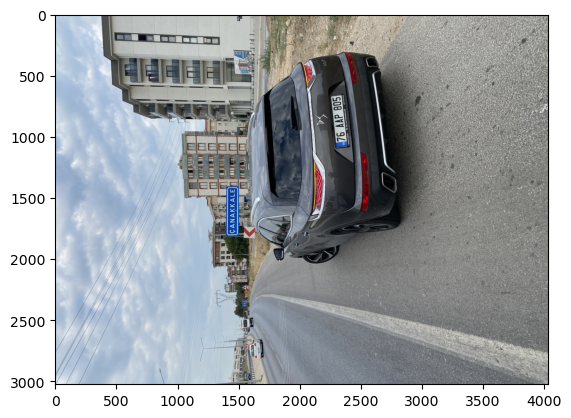

In [60]:
from PIL import Image
import matplotlib.pyplot as plt

def test_model_on_image(model, image_path, transform, device):
    image = Image.open(image_path).convert("RGB")
    image_transformed = transform(image).unsqueeze(0).to(device)  # Batch boyutunu ekleyin ve cihazı belirtin
    
    model.eval()  # Modeli değerlendirme moduna al
    with torch.no_grad():  # Gradyan hesaplamasını devre dışı bırak
        output = model(image_transformed)
    
    output = output.squeeze().cpu().numpy()  # Çıktıyı numpy dizisine çevirme
    print(f"Model Output (Bounding Box): {output}")
    
    # Orijinal görüntüyü göster ve bounding box'ı çiz
    plt.imshow(image)
    plt.gca().add_patch(plt.Rectangle((output[0], output[1]), output[2]-output[0], output[3]-output[1], fill=False, edgecolor='red', linewidth=2))
    plt.show()

# Kendi fotoğrafınızı test edin
test_image_path = '/Users/mehdiarat/Downloads/IMG_0505.JPG'  # Kendi fotoğraf yolunuzu girin
test_model_on_image(model, test_image_path, transform, device)

# **Yeni tip**

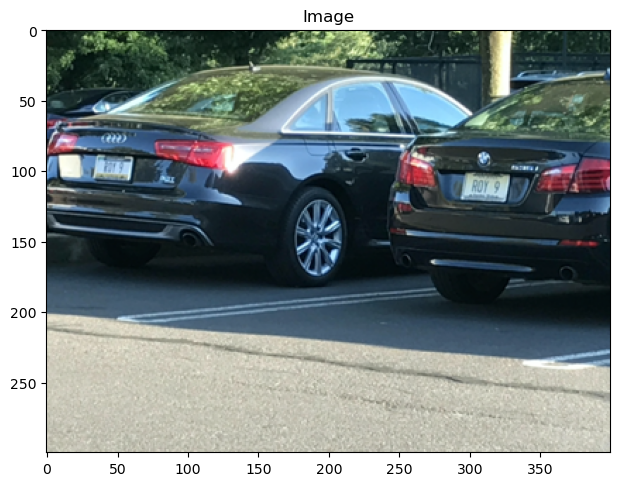

In [7]:
from PIL import Image
import torchvision.transforms as transforms

img = Image.open("/Users/mehdiarat/Downloads/archive (1)/images/Cars81.png")
transform = transforms.ToTensor()
image_tensor = transform(img)
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Image")
plt.imshow(image_tensor.permute(1, 2, 0))


### **Annotation ile görselleme**

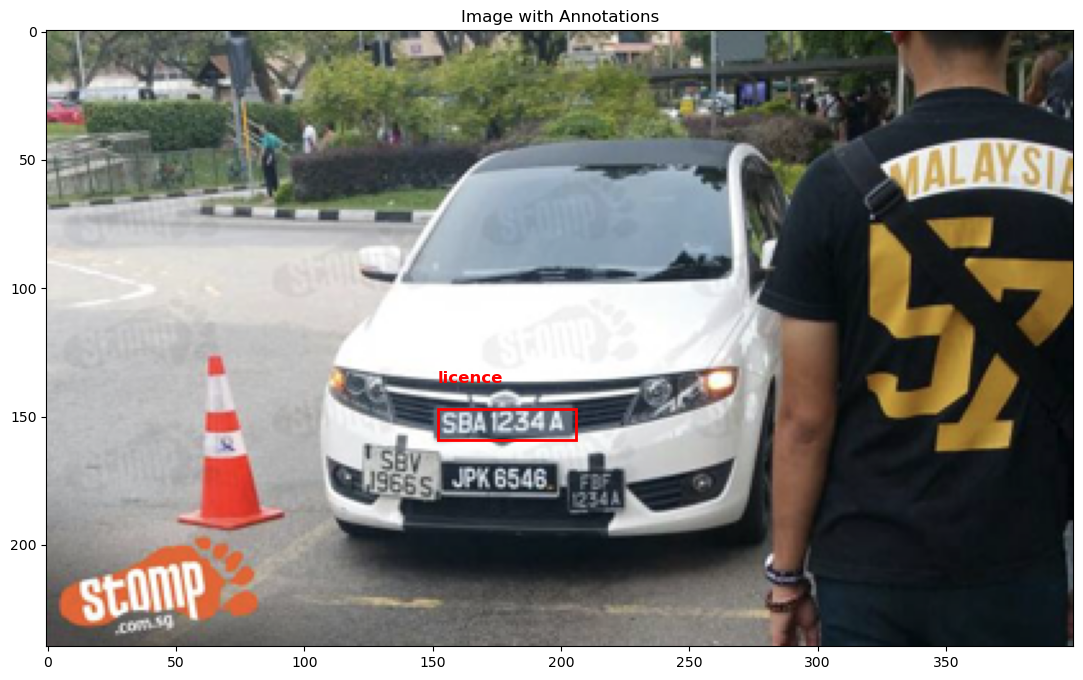

In [21]:
import matplotlib.pyplot as plt
from PIL import Image
import xml.etree.ElementTree as ET
import matplotlib.patches as patches

# XML dosyasını yükleme
tree = ET.parse('/Users/mehdiarat/Downloads/archive (1)/annotations/Cars105.xml')
root = tree.getroot()

# Görüntü dosyasının adını XML'den alıyoruz
filename = root.find('filename').text
image_path = f"/Users/mehdiarat/Downloads/archive (1)/images/Cars105.png"

# PIL kullanarak görüntüyü yükleme
image = Image.open(image_path)

# Görüntüyü görselleştirme
plt.figure(figsize=(16, 8))
plt.imshow(image)

# Sınırlayıcı kutular için döngü
for obj in root.findall('object'):
    label = obj.find('name').text
    bbox = obj.find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)
    
    # Sınırlayıcı kutuyu çizme
    rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(xmin, ymin - 10, label, color='red', fontsize=12, weight='bold')

plt.title("Image with Annotations")
plt.show()

In [12]:
import numpy as np

# Görüntüyü numpy array olarak dönüştürme
image_np = image.permute(1, 2, 0).numpy()

# Görüntüdeki en küçük ve en büyük değerleri kontrol etme
print(f"Min value: {np.min(image_np)}, Max value: {np.max(image_np)}")

Min value: 0.0, Max value: 257.0


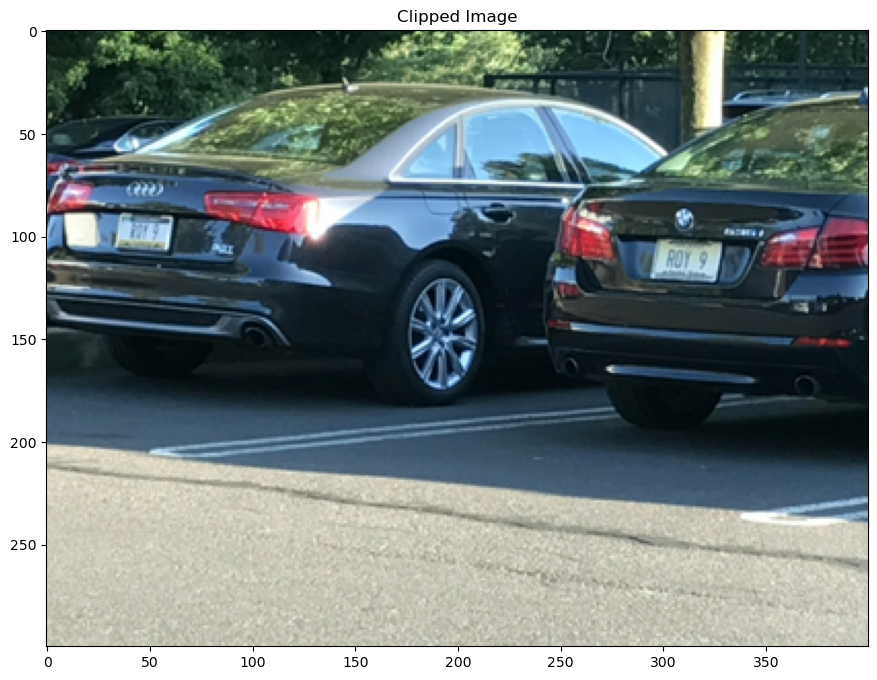

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü numpy array olarak dönüştürme
image_np = image.permute(1, 2, 0).numpy()

# Değerleri 0-255 aralığına kırpma
image_np = np.clip(image_np, 0, 255)

# Görüntüyü tekrar gösterme
plt.figure(figsize=(16, 8))
plt.imshow(image_np.astype(np.uint8))
plt.title("Clipped Image")
plt.show()

In [22]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 2  # 1 class (person) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [23]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# load a pre-trained model for classification and return
# only the features
backbone = torchvision.models.mobilenet_v2(weights="DEFAULT").features
# ``FasterRCNN`` needs to know the number of
# output channels in a backbone. For mobilenet_v2, it's 1280
# so we need to add it here
backbone.out_channels = 1280

# let's make the RPN generate 5 x 3 anchors per spatial
# location, with 5 different sizes and 3 different aspect
# ratios. We have a Tuple[Tuple[int]] because each feature
# map could potentially have different sizes and
# aspect ratios
anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128, 256, 512),),
    aspect_ratios=((0.5, 1.0, 2.0),)
)

# let's define what are the feature maps that we will
# use to perform the region of interest cropping, as well as
# the size of the crop after rescaling.
# if your backbone returns a Tensor, featmap_names is expected to
# be [0]. More generally, the backbone should return an
# ``OrderedDict[Tensor]``, and in ``featmap_names`` you can choose which
# feature maps to use.
roi_pooler = torchvision.ops.MultiScaleRoIAlign(
    featmap_names=['0'],
    output_size=7,
    sampling_ratio=2
)

# put the pieces together inside a Faster-RCNN model
model = FasterRCNN(
    backbone,
    num_classes=2,
    rpn_anchor_generator=anchor_generator,
    box_roi_pool=roi_pooler
)

In [24]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask,
        hidden_layer,
        num_classes
    )

    return model

In [26]:
import os
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")

--2024-08-27 12:31:43--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
raw.githubusercontent.com (raw.githubusercontent.com) çözümleniyor... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
raw.githubusercontent.com (raw.githubusercontent.com)[185.199.108.133]:443 bağlanılıyor... bağlantı kuruldu.
HTTP isteği gönderildi, yanıt bekleniyor... 200 OK
Uzunluk: 4063 (4,0K) [text/plain]
Kayıt yeri: `engine.py.3'

     0K ...                                                   100% 6,66M=0,001s

2024-08-27 12:31:43 (6,66 MB/s) - `engine.py.3' kaydedildi [4063/4063]

--2024-08-27 12:31:43--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
raw.githubusercontent.com (raw.githubusercontent.com) çözümleniyor... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443 bağlanılıyor... bağlantı kuruldu.
HTTP isteği gönderildi, yanıt bekleniyor... 200 

0

In [27]:
from torchvision.transforms import v2 as T


def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

In [29]:
import shutil
from sklearn.model_selection import KFold

In [30]:
# Görüntülerin ve anotasyonların bulunduğu dizin
image_dir = '/Users/mehdiarat/Downloads/archive (1)/images'
annotation_dir = '/Users/mehdiarat/Downloads/archive (1)/annotations'

# K-Fold için temel dizin
kfold_base_dir = '/Users/mehdiarat/Downloads/archive (1)/kfold'

# K-Fold sayısı
k = 5

# K-Fold dizinlerini oluştur
for i in range(k):
    os.makedirs(os.path.join(kfold_base_dir, f'fold_{i+1}', 'train', 'images'), exist_ok=True)
    os.makedirs(os.path.join(kfold_base_dir, f'fold_{i+1}', 'train', 'annotations'), exist_ok=True)
    os.makedirs(os.path.join(kfold_base_dir, f'fold_{i+1}', 'test', 'images'), exist_ok=True)
    os.makedirs(os.path.join(kfold_base_dir, f'fold_{i+1}', 'test', 'annotations'), exist_ok=True)

In [31]:
# Görüntü dosyalarının listesini al
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

# K-Fold Cross-Validation uygulama
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(image_files)):
    # Eğitim ve test setini belirleme
    train_images = [image_files[i] for i in train_index]
    test_images = [image_files[i] for i in test_index]
    
    # Eğitim setine görüntüleri ve anotasyonları kopyala
    for image_file in train_images:
        annotation_file = image_file.replace('.png', '.xml')
        shutil.copy(os.path.join(image_dir, image_file), os.path.join(kfold_base_dir, f'fold_{fold+1}', 'train', 'images', image_file))
        shutil.copy(os.path.join(annotation_dir, annotation_file), os.path.join(kfold_base_dir, f'fold_{fold+1}', 'train', 'annotations', annotation_file))
    
    # Test setine görüntüleri ve anotasyonları kopyala
    for image_file in test_images:
        annotation_file = image_file.replace('.png', '.xml')
        shutil.copy(os.path.join(image_dir, image_file), os.path.join(kfold_base_dir, f'fold_{fold+1}', 'test', 'images', image_file))
        shutil.copy(os.path.join(annotation_dir, annotation_file), os.path.join(kfold_base_dir, f'fold_{fold+1}', 'test', 'annotations', annotation_file))

In [8]:
import os
k=5
kfold_base_dir = '/Users/mehdiarat/Downloads/archive (1)/kfold'

for i in range(k):
    train_images = os.listdir(os.path.join(kfold_base_dir, f'fold_{i+1}', 'train', 'images'))
    test_images = os.listdir(os.path.join(kfold_base_dir, f'fold_{i+1}', 'test', 'images'))
    
    print(f"Fold {i+1}: Eğitim setinde {len(train_images)} görüntü, test setinde {len(test_images)} görüntü var.")

Fold 1: Eğitim setinde 346 görüntü, test setinde 87 görüntü var.
Fold 2: Eğitim setinde 346 görüntü, test setinde 87 görüntü var.
Fold 3: Eğitim setinde 346 görüntü, test setinde 87 görüntü var.
Fold 4: Eğitim setinde 347 görüntü, test setinde 86 görüntü var.
Fold 5: Eğitim setinde 347 görüntü, test setinde 86 görüntü var.


In [9]:
import os
import torch
import torchvision.transforms as T
from PIL import Image
import xml.etree.ElementTree as ET

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, annotation_dir, transforms=None):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.transforms = transforms
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        # Load the image
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        img = Image.open(img_path).convert("RGB")
        
        # Load the annotation
        annotation_path = os.path.join(self.annotation_dir, self.image_files[idx].replace('.png', '.xml'))
        boxes, labels = self.parse_voc_xml(annotation_path)
        
        # Convert to Tensor
        target = {}
        target["boxes"] = torch.as_tensor(boxes, dtype=torch.float32)
        target["labels"] = torch.as_tensor(labels, dtype=torch.int64)
        
        if self.transforms:
            img = self.transforms(img)
        
        return img, target
    
    def parse_voc_xml(self, xml_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        boxes = []
        labels = []
        for obj in root.findall('object'):
            label = obj.find('name').text
            labels.append(self.class_to_idx(label))
            
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            boxes.append([xmin, ymin, xmax, ymax])
        
        return boxes, labels
    
    def class_to_idx(self, class_name):
        class_dict = {'licence': 1}  # Ensure this matches your class labels
        return class_dict[class_name]


In [10]:
from torch.utils.data import DataLoader
from torchvision import transforms

# Define a fixed size (e.g., 224x224)
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])



# Assuming k is the current fold number
train_dataset = CustomDataset(image_dir=f'/Users/mehdiarat/Downloads/archive (1)/kfold/fold_{k}/train/images',
                              annotation_dir=f'/Users/mehdiarat/Downloads/archive (1)/kfold/fold_{k}/train/annotations',
                              transforms=T.ToTensor())
test_dataset = CustomDataset(image_dir=f'//Users/mehdiarat/Downloads/archive (1)/kfold/fold_{k}/test/images',
                             annotation_dir=f'/Users/mehdiarat/Downloads/archive (1)/kfold/fold_{k}/test/annotations',
                             transforms=T.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)


In [11]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torch

# Define the device
device = torch.device('mps') if torch.backends.mps.is_available()  else torch.device('cpu')

# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Get the number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# Define your class dictionary
class_dict = {
    'licence': 1  # Only one class
}

# Replace the head with a new one, with the correct number of classes
num_classes = len(class_dict) + 1  # +1 for the background class
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Move the model to the appropriate device
model.to(device)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [12]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import time

device = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu')
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

num_epochs = 10
def custom_collate_fn(batch):
        images = [item[0] for item in batch]
        targets = [item[1] for item in batch]
        return images, targets

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=0, collate_fn=custom_collate_fn)



In [13]:

model.train()
print(f"train mode on")
for epoch in range(num_epochs):
    train_loss = 0
    

    t1= time.time()
    for images, targets in train_loader:
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            optimizer.zero_grad()
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            optimizer.step()
    
            train_loss += losses.item()
            break
     
    lr_scheduler.step()
    print(f"Epoch: {epoch}, Loss: {train_loss}")
    t2= time.time()
    print(f"EPOCH TIME", t2-t1)
    # Save the model after every epoch or specific intervals
    torch.save(model.state_dict(), f'fasterrcnn_fold_{k}_epoch_{epoch}.pth')
    break

train mode on
Epoch: 0, Loss: 0.9291266798973083
EPOCH TIME 144.3429298400879


In [7]:
model.eval()
with torch.no_grad():
    for images, targets in test_loader:
        images = list(image.to(device) for image in images)
        outputs = model(images)
        
        # You can implement your own evaluation metrics or use pre-built ones
